In [12]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [13]:
df = aux.load_data(Path("../results_synced/ratio/"))
#df.groupby(["dataset", "arch", "nsamp_tra", "nsamp_pre"]).count()
#df = df[df["fold_number"] == 1]
#df[df["pretrained"]]["target_best_model"].str.split("/").str[6].str.removeprefix("epoch=").str.split("-").str[0].astype(int).hist()
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_size,target_val_acc,target_val_f1,target_val_auroc,...,target_nepochs,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_acc,pretrain_val_f1,pretrain_val_auroc,pretrain_best_model,pretrain_train_csv,pretrain_nepochs
0,GunPoint,CNN_DFS,False,3,0,128,5,0.481771,0.481771,0.272144,...,120,1227,0,5985,NaN,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN_DFS,True,3,0,128,5,0.473958,0.473958,0.618878,...,120,1227,3627,5985,0.825521,0.825521,0.968399,training/exp/EXP_ratio_f3.0_2023-03-07_14-24/l...,training/exp/EXP_ratio_f3.0_2023-03-07_14-24/l...,60.0
2,GunPoint,CNN_DFS,True,3,0,128,5,0.528646,0.528646,0.686405,...,120,1227,7254,5985,0.822780,0.822780,0.957245,training/exp/EXP_ratio_f3.0_2023-03-07_14-46/l...,training/exp/EXP_ratio_f3.0_2023-03-07_14-46/l...,60.0
3,GunPoint,CNN_DFS,True,3,0,128,5,0.541667,0.541667,0.682276,...,120,1227,10881,5985,0.839007,0.839007,0.968910,training/exp/EXP_ratio_f3.0_2023-03-07_15-10/l...,training/exp/EXP_ratio_f3.0_2023-03-07_15-10/l...,60.0
4,GunPoint,CNN_DFS,True,3,0,128,5,0.585938,0.585938,0.647290,...,120,1227,14508,5985,0.817640,0.817640,0.966312,training/exp/EXP_ratio_f3.0_2023-03-07_15-35/l...,training/exp/EXP_ratio_f3.0_2023-03-07_15-35/l...,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,PowerCons,CNN_TS,True,0,0,128,5,0.662667,0.662667,0.690809,...,120,10497,6246,10353,0.713867,0.713867,0.925649,training/exp/EXP_ratio_f0.4_2023-03-09_22-54/l...,training/exp/EXP_ratio_f0.4_2023-03-09_22-54/l...,60.0
1458,PowerCons,CNN_TS,True,0,0,128,5,0.665458,0.665458,0.700110,...,120,10497,12492,10353,0.732422,0.732422,0.917488,training/exp/EXP_ratio_f0.4_2023-03-09_23-09/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-09/l...,60.0
1459,PowerCons,CNN_TS,True,0,0,128,5,0.666295,0.666295,0.707757,...,120,10497,18739,10353,0.725287,0.725287,0.911184,training/exp/EXP_ratio_f0.4_2023-03-09_23-26/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-26/l...,60.0
1460,PowerCons,CNN_TS,True,0,0,128,5,0.663225,0.663225,0.710990,...,120,10497,24985,10353,0.733534,0.733534,0.906381,training/exp/EXP_ratio_f0.4_2023-03-09_23-46/l...,training/exp/EXP_ratio_f0.4_2023-03-09_23-46/l...,60.0


In [14]:
# how many are done?
df.groupby(["arch", "dataset"])["pretrained"].count()

arch       dataset  
CNN_DFS    Coffee       101
           GunPoint     150
CNN_TS     Coffee       150
           GunPoint     150
           PowerCons     68
RNN_TS     Coffee       150
           GunPoint     150
           PowerCons    128
ResNet_TS  Coffee       150
           GunPoint     150
           PowerCons    115
Name: pretrained, dtype: int64

In [15]:
dfr = aux.EXP_ratio_preprocessing(df)
dfr

,arch,dataset,nsamp_pre,nsamp_tra,pretrain_val_acc_mean,pretrain_val_acc_std,pretrain_val_auroc_mean,pretrain_val_auroc_std,pretrain_val_f1_mean,pretrain_val_f1_std,...,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,Coffee,0,683,NaN,NaN,NaN,NaN,NaN,NaN,...,0.400484,0.023484,0.446940,0.014638,0.312500,0.000000,0.000000,0.000000,0.312500,0.000000
1,CNN_DFS,Coffee,1998,683,0.816016,0.014567,0.920877,0.030793,0.816016,0.014567,...,0.491545,0.031059,0.521240,0.025090,0.815430,0.019499,0.789808,0.029437,0.815430,0.019499
2,CNN_DFS,Coffee,3997,683,0.849023,0.016602,0.945618,0.017219,0.849023,0.016602,...,0.489140,0.023935,0.512689,0.027834,0.813477,0.077823,0.802148,0.077030,0.813477,0.077823
3,CNN_DFS,Coffee,5996,683,0.867310,0.006910,0.956737,0.006788,0.867310,0.006910,...,0.491285,0.020139,0.513277,0.023649,0.829102,0.038456,0.832013,0.084546,0.829102,0.038456
4,CNN_DFS,Coffee,7995,683,0.868955,0.004787,0.960405,0.002402,0.868955,0.004787,...,0.489830,0.023262,0.489652,0.008916,0.717773,0.098686,0.811097,0.077109,0.717773,0.098686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,ResNet_TS,PowerCons,6246,10497,0.765788,0.019830,0.925093,0.005361,0.765788,0.019830,...,0.695522,0.060159,0.650553,0.031177,0.649647,0.037216,0.697425,0.026163,0.649647,0.037216
326,ResNet_TS,PowerCons,12492,10497,0.783122,0.034618,0.932624,0.008750,0.783122,0.034618,...,0.672852,0.062997,0.644596,0.025025,0.653832,0.030749,0.661966,0.038922,0.653832,0.030749
327,ResNet_TS,PowerCons,18739,10497,0.740965,0.085778,0.918521,0.004753,0.740965,0.085778,...,0.678624,0.082761,0.643880,0.044936,0.649275,0.022731,0.681559,0.048572,0.649275,0.022731
328,ResNet_TS,PowerCons,24985,10497,0.775881,0.004034,0.931482,0.010305,0.775881,0.004034,...,0.664743,0.024237,0.642025,0.023742,0.647228,0.033927,0.657316,0.054961,0.647228,0.033927


<Figure size 640x480 with 0 Axes>

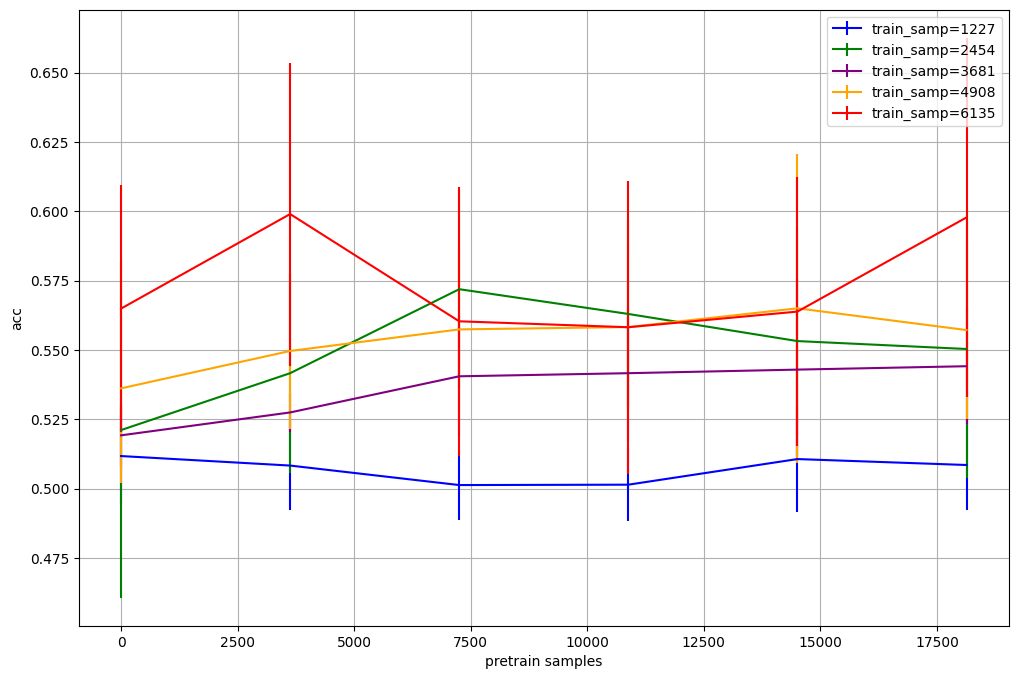

In [23]:

plt.figure()

metric = "acc"
arch = "RNN_TS"
dataset = "GunPoint"

colors = ["blue", "green", "purple", "orange", "red"]
fig, ax = plt.subplots(figsize=[12,8])
for i, (nsamp_pre, dfg) in enumerate(dfr[dfr["arch"] == arch][dfr["dataset"] == dataset].replace(np.NaN, 0).groupby("nsamp_tra")):
    # ax.plot(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    ax.errorbar(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], yerr=dfg[f"target_test_{metric}_std"], 
                label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    # ax.fill_between(dfg["nsamp_pre"], y1=dfg[f"target_test_{metric}_mean"]+dfg[f"target_test_{metric}_std"], 
    #     y2=dfg[f"target_test_{metric}_mean"]-dfg[f"target_test_{metric}_std"], alpha = 0.5, color=colors[i])
plt.legend()
plt.grid(True)
plt.xlabel("pretrain samples")
plt.ylabel(metric);
plt.show();

In [102]:
dfrb = aux.EXP_ratio_set_baselines(dfr)
# dfrb[dfrb["nsamp_tra"]!=4908]["target_test_acc_mean"].max()
dfrb

,arch,dataset,nsamp_pre,nsamp_tra,target_test_acc_mean,target_test_acc_std,target_test_auroc_mean,target_test_auroc_std,target_test_f1_mean,target_test_f1_std,target_val_acc_mean,target_val_acc_std,target_val_auroc_mean,target_val_auroc_std,target_val_f1_mean,target_val_f1_std
0,CNN_DFS,Coffee,1998,683,0.074382,0.05133,0.077458,0.063903,0.074382,0.05133,0.488281,0.016573,0.773828,0.023553,0.488281,0.016573
1,CNN_DFS,Coffee,3997,683,0.070788,0.023726,0.078432,0.028353,0.070788,0.023726,0.453125,0.093913,0.752095,0.080805,0.453125,0.093913
2,CNN_DFS,Coffee,5996,683,0.080429,0.049683,0.087292,0.053002,0.080429,0.049683,0.486328,0.002762,0.772195,0.079801,0.486328,0.002762
3,CNN_DFS,Coffee,7995,683,0.049454,0.026276,0.07928,0.053272,0.049454,0.026276,0.398438,0.049718,0.77358,0.025412,0.398438,0.049718
4,CNN_DFS,Coffee,9995,683,0.048002,0.013598,0.085886,0.027375,0.048002,0.013598,0.357422,0.019335,0.745241,0.027923,0.357422,0.019335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,ResNet_TS,PowerCons,31233,4198,-0.025098,NaN,0.049341,NaN,-0.025098,NaN,-0.017756,NaN,0.074445,NaN,-0.017756,NaN
233,ResNet_TS,PowerCons,6246,6298,0.008691,NaN,0.072683,NaN,0.008691,NaN,0.027832,NaN,0.087139,NaN,0.027832,NaN
234,ResNet_TS,PowerCons,12492,6298,0.005762,NaN,0.017817,NaN,0.005762,NaN,0.027832,NaN,0.02118,NaN,0.027832,NaN
235,ResNet_TS,PowerCons,18739,6298,-0.002246,NaN,0.072414,NaN,-0.002246,NaN,0.019043,NaN,0.093505,NaN,0.019043,NaN


general improvement: 0.02033831572532658


nsamp_pre
3627     0.001406
7254     0.035319
10881    0.016556
14508    0.014626
18135    0.033784
Name: target_test_acc_mean, dtype: float64

<Figure size 640x480 with 0 Axes>

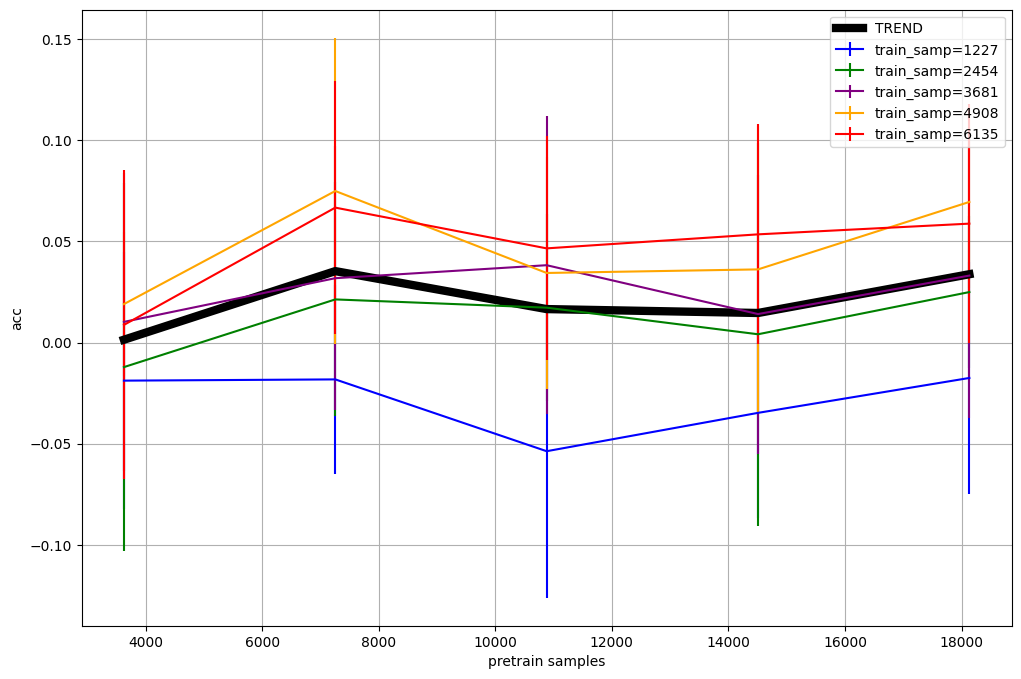

In [107]:

plt.figure()

#dfrb = dfrb[dfrb["nsamp_tra"] != 4908]

metric = "acc"
arch = "CNN_TS"
dataset = "GunPoint"

dfrb_filt = dfrb[dfrb["arch"] == arch][dfrb["dataset"] == dataset].replace(np.NaN, 0)


colors = ["blue", "green", "purple", "orange", "red"]
fig, ax = plt.subplots(figsize=[12,8])
for i, (nsamp_pre, dfg) in enumerate(dfrb_filt.groupby("nsamp_tra")):
    # ax.plot(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    ax.errorbar(dfg["nsamp_pre"], dfg[f"target_test_{metric}_mean"], yerr=dfg[f"target_test_{metric}_std"], 
                label=f'train_samp={dfg["nsamp_tra"].unique()[0]}', c=colors[i])
    # ax.fill_between(dfg["nsamp_pre"], y1=dfg[f"target_test_{metric}_mean"]+dfg[f"target_test_{metric}_std"], 
    #  y2=dfg[f"target_test_{metric}_mean"]-dfg[f"target_test_{metric}_std"], alpha = 0.5, color=colors[i])

ax.plot(dfrb_filt["nsamp_pre"].unique(), dfrb_filt.groupby("nsamp_pre")[f"target_test_{metric}_mean"].mean(), label="TREND", c="black", lw=6)
plt.legend()
plt.grid(True)
plt.xlabel("pretrain samples")
plt.ylabel(metric)

print("general improvement:", dfrb_filt[f"target_test_{metric}_mean"].mean())
dfrb_filt.groupby("nsamp_pre")[f"target_test_{metric}_mean"].mean()

